# Machine Learning Algorithms

# Simple Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier


In [2]:
# Sample data
hours_studied = np.array([2, 3, 4, 5, 6, 7]).reshape(-1, 1)
scores = np.array([60, 70, 80, 85, 90, 95])

model = LinearRegression()
model.fit(hours_studied, scores)

LinearRegression()

In [3]:
# Predict a student's score for 8 hours of study
hours_new = np.array([8]).reshape(-1, 1)
predicted_score = model.predict(hours_new)
print("Predicted score for 8 hours of study:", predicted_score[0])

Predicted score for 8 hours of study: 104.0


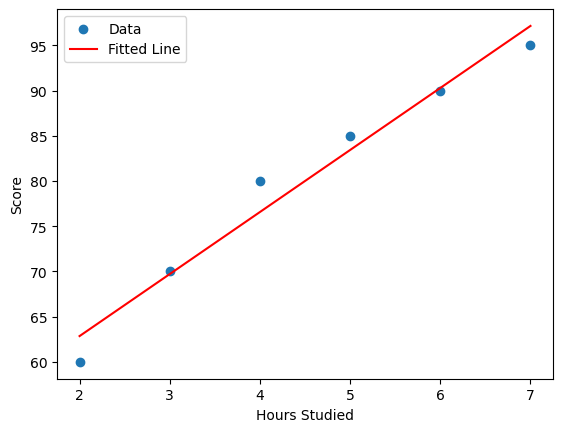

In [4]:
# Visualize the data and the fitted line
plt.scatter(hours_studied, scores, label='Data')
plt.plot(hours_studied, model.predict(hours_studied), color='red', label='Fitted Line')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.show()

# Multiple Linear Regression

In [5]:
# Sample data
sizes = np.array([1500, 2000, 1800, 2100, 3000, 2500])
bedrooms = np.array([3, 4, 3, 4, 5, 4])
bathrooms = np.array([2, 3, 2, 3, 4, 3])
prices = np.array([250000, 320000, 280000, 340000, 500000, 410000])

df = pd.DataFrame(list(zip(sizes,bedrooms,bathrooms,prices)),columns=["sizes","bedrooms","bathrooms","prices"])


model = LinearRegression()
model.fit(df[["sizes","bedrooms","bathrooms"]], df["prices"])

LinearRegression()

In [6]:
# Predict the price for a house with features: size = 2200, bedrooms = 4, bathrooms = 3
new_data = np.array([[2200, 4, 3]])
predicted_price = model.predict(new_data)
print("Predicted price for the given house features:", predicted_price[0])


Predicted price for the given house features: 359147.72727272735


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


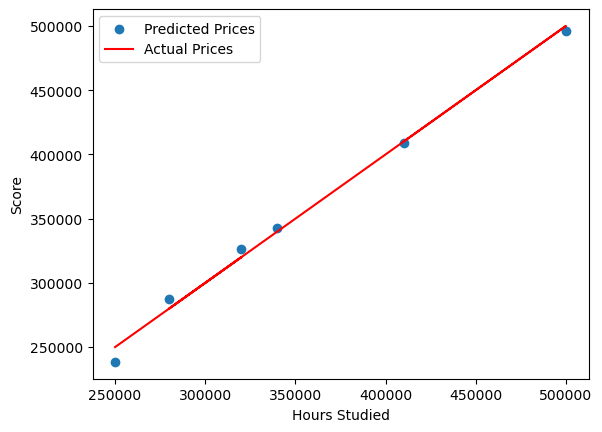

In [7]:
# Visualize the data and the fitted line
plt.scatter(df["prices"],model.predict(df[["sizes","bedrooms","bathrooms"]]), label='Predicted Prices')
plt.plot(df["prices"],df["prices"], color='red', label='Actual Prices')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.show()

In [8]:
df1 = pd.read_csv("encoded_emails.csv")
df1.head(5)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
X = df1["Message"]
y = df1["Category"]

In [10]:
# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ML Models

In [12]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train , y_train)

#Support Vector Machine(SVM)
svm = SVC()
svm.fit(X_train , y_train)

#Naive Bayes
nb = GaussianNB()
nb.fit(X_train.toarray() , y_train)

#Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train.toarray() , y_train)

#Random Forest 
rf = RandomForestClassifier()
rf.fit(X_train.toarray() , y_train)

#K-Nearest Neighbour (KNN at k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train.toarray() , y_train)

KNeighborsClassifier(n_neighbors=3)

# Models Accuracies

In [13]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression                :", accuracy)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM                                :", accuracy)

# Make predictions on the test set
y_pred = nb.predict(X_test.toarray())

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Naive Bayes Classifier             :", accuracy)

# Make predictions on the test set
y_pred = dt.predict(X_test.toarray())

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree Classifier           :", accuracy)

# Make predictions on the test set
y_pred = rf.predict(X_test.toarray())

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Classifier           :", accuracy)



# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Ada Boost                          :", accuracy)

# Make predictions on the test set
y_pred = knn.predict(X_test.toarray())

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of K-Nearest Neighbours (KNN at k=3)  :", accuracy)




Accuracy of Logistic Regression                : 0.9635167464114832
Accuracy of SVM                                : 0.9808612440191388
Accuracy of Naive Bayes Classifier             : 0.9102870813397129
Accuracy of Decision Tree Classifier           : 0.9736842105263158
Accuracy of Random Forest Classifier           : 0.9766746411483254
Accuracy of Ada Boost                          : 0.9766746411483254
Accuracy of K-Nearest Neighbours (KNN at k=3)  : 0.9222488038277512


# Gradient Boosting Techniques

In [14]:
#Ada Boost
weak_learner = DecisionTreeClassifier(max_depth=1)
ada_classifier = AdaBoostClassifier(base_estimator=weak_learner, n_estimators=50, random_state=42)
ada_classifier.fit(X_train, y_train)

#Light Gradient Boosting (lighbm)
# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
# Set hyperparameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
# Train the LightGBM model
num_rounds = 100
lgb_model = lgb.train(params, train_data, num_boost_round=num_rounds)


# XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)

# CatBoost classifier
catboost_classifier = CatBoostClassifier(iterations=100, random_state=42)
catboost_classifier.fit(X_train, y_train)



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008642 seconds.
You can set `force_col_wise=true` to remove the overhead.
Learning rate set to 0.152166
0:	learn: 0.5336982	total: 270ms	remaining: 26.7s
1:	learn: 0.4271861	total: 310ms	remaining: 15.2s
2:	learn: 0.3560125	total: 349ms	remaining: 11.3s
3:	learn: 0.3029378	total: 391ms	remaining: 9.38s
4:	learn: 0.2603002	total: 430ms	remaining: 8.17s
5:	learn: 0.2364007	total: 468ms	remaining: 7.33s
6:	learn: 0.2134595	total: 507ms	remaining: 6.74s
7:	learn: 0.1957810	total: 544ms	remaining: 6.26s
8:	learn: 0.1822947	total: 582ms	remaining: 5.89s
9:	learn: 0.1683614	total: 620ms	remaining: 5.58s
10:	learn: 0.1610274	total: 658ms	remaining: 5.33s
11:	learn: 0.1529592	total: 696ms	remaining: 5.1s
12:	learn: 0.1457076	total: 734ms	remaining: 4.91s
13:	learn: 0.1393862	total: 775ms	remaining: 4.76s
14:	learn: 0.1333184	total: 811ms	remaining: 4.6s
15:	learn: 0.1291421	total: 848ms	remaining: 4.45s
1

In [15]:
# Convert probabilities to binary predictions
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy of Lightbm                            :", accuracy)

# Make predictions on the test set
y_pred = ada_classifier.predict(X_test.toarray())
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Ada Boost                          :", accuracy)


# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of XGboost                            :", accuracy)


# Make predictions on the test set
y_pred = catboost_classifier.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Catboost                           :", accuracy)

Accuracy of Lightbm                            : 0.9222488038277512
Accuracy of Ada Boost                          : 0.979066985645933
Accuracy of XGboost                            : 0.9832535885167464
Accuracy of Catboost                           : 0.9772727272727273


# Neural Networks

In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
# Determine the input shape based on the training data
input_shape = X_train.shape[1:]

In [18]:
input_shape

(8709,)

In [19]:
model = Sequential()

In [20]:
model.add(Dense(10, input_shape=input_shape, activation='relu'))

model.add(Dense(20,  activation='relu'))
model.add(Dense(20,  activation='relu'))

model.add(Dense(1, activation='sigmoid'))


In [21]:
model.compile(loss = 'binary_crossentropy' , optimizer='adam' , metrics = ['accuracy'])

In [22]:
show = model.fit(X_train.toarray() , y_train , epochs=10 , batch_size = 32)

Epoch 1/10
122/122 [==============================] - 1s 3ms/step - loss: 0.4870 - accuracy: 0.8623
Epoch 2/10
122/122 [==============================] - 0s 3ms/step - loss: 0.1225 - accuracy: 0.9500
Epoch 3/10
122/122 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9938
Epoch 4/10
122/122 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9977
Epoch 5/10
122/122 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.9992
Epoch 6/10
122/122 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 0.9997
Epoch 7/10
122/122 [==============================] - 0s 3ms/step - loss: 9.3507e-04 - accuracy: 1.0000
Epoch 8/10
122/122 [==============================] - 0s 3ms/step - loss: 6.0951e-04 - accuracy: 1.0000
Epoch 9/10
122/122 [==============================] - 0s 3ms/step - loss: 4.3592e-04 - accuracy: 1.0000
Epoch 10/10
122/122 [==============================] - 0s 3ms/step - loss: 3.2871e-04 - 

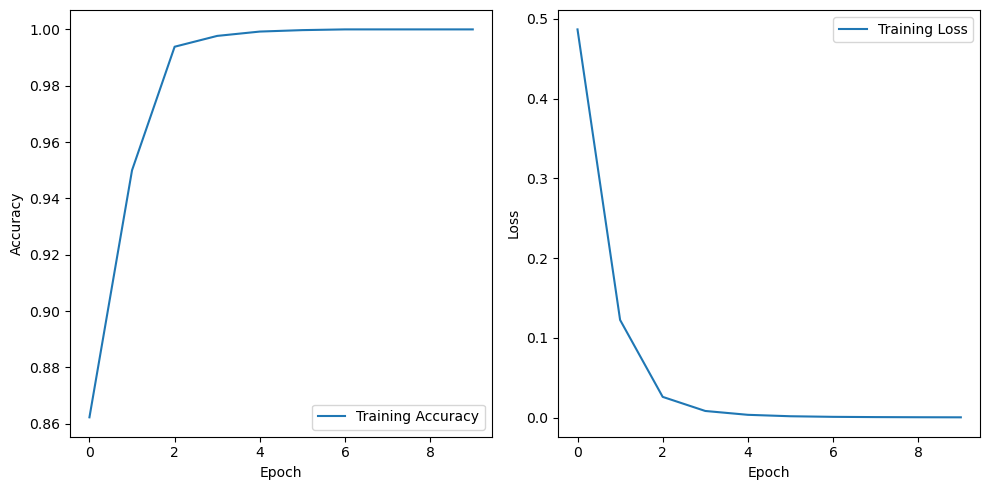

In [23]:
# Plot the accuracy and loss graphs
plt.figure(figsize=(10, 5))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(show.history['accuracy'], label='Training Accuracy')
# plt.plot(show.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(show.history['loss'], label='Training Loss')
# plt.plot(show.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()